In [2]:
# その他のモジュールのインポート
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, 
                             confusion_matrix, ConfusionMatrixDisplay)
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint, expon
import random

In [3]:
# ファイルの読み込み、データの格納・欠損値処理・確認
# file_path = "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/ビニング処理_卒研A.csv"
# file_path = "E:/実験/実験結果/卒研B/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/2. 不要特徴量削除/2.不要特徴量削除後 分類テスト.csv"
# file_path =  "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/vif_result.csv"
# file_path =  "C:/Users/thisi/OneDrive/共有ファイル/卒研B/データ最終版/2. 最終ファイルVIF主成分分析後 (2値sddis追加).csv"
file_path =  "C:/Users/thisi/OneDrive/共有ファイル/リモートデスクトップ/データセット/0. データセット原本/データセット原本_完全版.csv"
# target_column = "SD_dis"
data = pd.read_csv(file_path)
data = data["主観難易度"]
# # data = data.drop(columns=["SD_con","Interest","Duration_of_first_Visit"])
# data = data.fillna(data.mean())
data.info()
# X = data.drop(columns=[target_column])
# y = data[target_column]

<class 'pandas.core.series.Series'>
RangeIndex: 590 entries, 0 to 589
Series name: 主観難易度
Non-Null Count  Dtype  
--------------  -----  
590 non-null    float64
dtypes: float64(1)
memory usage: 4.7 KB


In [4]:
# データの可視化
plt.figure(figsize=(50, 40))
corr_matrix = data.corr('pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# # データの可視化
# plt.figure(figsize=(50, 40))
# corr_matrix = data.corr('spearman')
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title("Correlation Matrix")
# plt.show()

# # 散布図行列は時間かかるのでやりたいときだけ
# sns.pairplot(data)
# plt.title("Scatter Plot Matrix")
# plt.show()

TypeError: unsupported type: <class 'str'>

<Figure size 5000x4000 with 0 Axes>

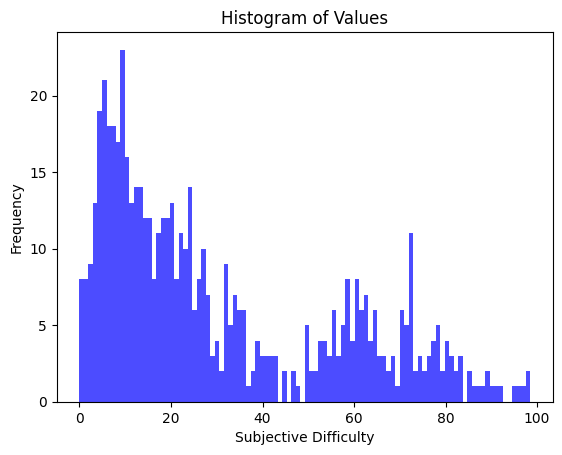

In [5]:
data.plot(kind='hist', bins=100, alpha=0.7, color='blue')
plt.xlabel('Subjective Difficulty')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

In [10]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie